### 1) Calculate all the coeficients

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

C:\Users\SN\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
red = pd.read_csv("winequality-red.csv", sep=';')
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
X = red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = red['quality']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          1.79e-145
Time:                        19:55:22   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
results.params

const                   21.965208
fixed acidity            0.024991
volatile acidity        -1.083590
citric acid             -0.182564
residual sugar           0.016331
chlorides               -1.874225
free sulfur dioxide      0.004361
total sulfur dioxide    -0.003265
density                -17.881164
pH                      -0.413653
sulphates                0.916334
alcohol                  0.276198
dtype: float64

In [7]:
# Interpretation
# coef - shows the effect of feature on target (quality)
# const - intercept (not meaningful in itself)
# R-squared - show what share of quality variation can be explained by the mode - the bigger the value, 
# the more predictive power model has (max at 1)

### 2) Calculate p-values. 

In [8]:
results.pvalues

const                   3.001921e-01
fixed acidity           3.356528e-01
volatile acidity        9.872361e-19
citric acid             2.149942e-01
residual sugar          2.764960e-01
chlorides               8.373953e-06
free sulfur dioxide     4.474495e-02
total sulfur dioxide    8.004610e-06
density                 4.086079e-01
pH                      3.100189e-02
sulphates               2.127228e-15
alcohol                 1.123029e-24
dtype: float64

In [9]:
#removed p-values that is > 0.05: fixed acidity, citric acid, residual sugar, density and got these pvalues:

In [10]:
X_new = red[['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
y = red['quality']

X_new = sm.add_constant(X_new)
model = sm.OLS(y,X_new)
results = model.fit()

In [11]:
results.pvalues

const                   3.726733e-27
volatile acidity        4.721084e-23
chlorides               4.313717e-07
free sulfur dioxide     1.702156e-02
total sulfur dioxide    4.434834e-07
pH                      4.234962e-05
sulphates               1.864837e-15
alcohol                 4.236397e-61
dtype: float64

### 3)

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
features = red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})

In [14]:
corr_matrix = features.corr()

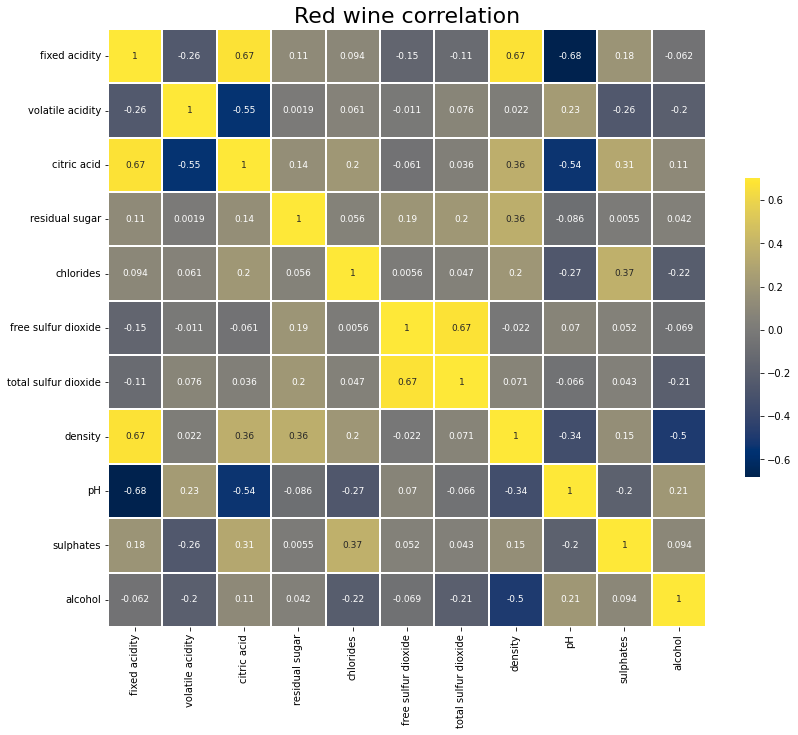

In [15]:
corr_plot(corr_matrix, "Red wine correlation")

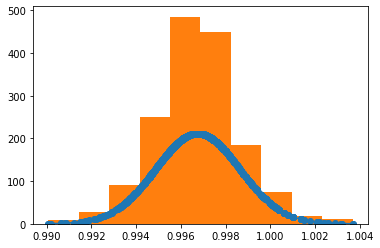

In [16]:
import scipy.stats as stats

h = sorted(red['density'])
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, np.mean(h), np.std(h))

plt.plot(h,pdf,'-o')

plt.hist(h)      

plt.show() 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import mean_absolute_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 4)

def wmape(y_true, y_pred):
    return sum(np.abs(y_true-y_pred))*100 / sum(y_true)

In [20]:
# Let's use 70% of random sample to train the model, and the remaining 30% of sample to test how good is the model
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred):,.3f}')
print(f'WMAPE: {wmape(y_test, y_pred):,.3f}')
print(f'RMSE: {rmse(y_test, y_pred):,.3f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):,.3f}')

MAPE: 0.088
WMAPE: 8.670
RMSE: 0.635
MAE: 0.493


In [19]:
# Smaller error means better model